In [4]:
import pandas as pd
import numpy as np

In [5]:
d = pd.read_csv('F:/UConn/03 Summer 2019/OPIM 5512/Lecture/wage.csv')
d.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791760,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [6]:
d.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


### Calculating Mean

In [7]:
d['educ'].mean()

12.562737642585551

In [8]:
d['educ'].sum()/float(len(d))

12.562737642585551

### Calculating Variance

In [9]:
d['educ'].var()

7.667485062466044

In [10]:
educ_meandiff = d['educ'] - d['educ'].mean()
np.dot(educ_meandiff.T, educ_meandiff)

4025.4296577946766

In [11]:
np.dot(educ_meandiff.T, educ_meandiff)/float(len(d)-1)

7.66748506246605

In [12]:
# Degree of freedom
len(d)-1

525

### Calculating SD

In [13]:
d['educ'].std()

2.7690224019436975

In [14]:
np.sqrt(np.dot(educ_meandiff.T, educ_meandiff)/float(len(d)-1))

2.769022401943699

### Mean, Variance, and SD 
    Force using DF = len(dataframe): ddof = 0

In [15]:
d['educ'].var(ddof=0)

7.652908094666679

In [16]:
np.dot(educ_meandiff.T, educ_meandiff)/float(len(d))

7.652908094666685

In [17]:
d['educ'].std(ddof=0)

2.766388999158773

In [18]:
np.sqrt(np.dot(educ_meandiff.T, educ_meandiff)/float(len(d)))

2.7663889991587745

### Building Simple Regression Models with statsmodels

In [19]:
import statsmodels.api as sm

In [20]:
y = d.wage
x = d.educ

In [21]:
x.head()

0    11
1    12
2    11
3     8
4    12
Name: educ, dtype: int64

In [22]:
x = sm.add_constant(d.educ)
x.head()

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,educ
0,1.0,11
1,1.0,12
2,1.0,11
3,1.0,8
4,1.0,12


In [23]:
model = sm.OLS(y,x)

In [24]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           2.78e-22
Time:                        09:05:04   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646
==============================================================================
Omnibus:                      212.554   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.843
Skew:                           1.861   Prob(JB):                    3.79e-176
Kurtosis:                       7.797   Cond. No.                         60.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x1 = sm.add_constant(d.tenure)

In [26]:
model_tenure = sm.OLS(y,x1)
results_tenure = model_tenure.fit()
results_tenure.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     71.68
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           2.56e-16
Time:                        09:05:04   Log-Likelihood:                -1399.3
No. Observations:                 526   AIC:                             2803.
Df Residuals:                     524   BIC:                             2811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9909      0.185     26.955      0.000       4.627       5.355
tenure         0.1773      0.021      8.466      0.000       0.136       0.218
==============================================================================
Omnibus:                      194.228   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              681.316
Skew:                           1.714   Prob(JB):                    1.13e-148
Kurtosis:                       7.398   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
predictions = results.predict()
predictions = pd.Series(predictions)
predictions.head()

0    5.050100
1    5.591459
2    5.050100
3    3.426022
4    5.591459
dtype: float64

In [28]:
R = pd.concat([y,x],axis=1)
R.head()

,wage,const,educ
0,3.10,1.0,11
1,3.24,1.0,12
2,3.00,1.0,11
3,6.00,1.0,8
4,5.30,1.0,12


In [29]:
R = pd.concat([predictions,R], axis=1)
R.head()

,0,wage,const,educ
0,5.050100,3.10,1.0,11
1,5.591459,3.24,1.0,12
2,5.050100,3.00,1.0,11
3,3.426022,6.00,1.0,8
4,5.591459,5.30,1.0,12


In [30]:
R.columns.values[0] = 'predicted_wage'
R.head()

,predicted_wage,wage,const,educ
0,5.050100,3.10,1.0,11
1,5.591459,3.24,1.0,12
2,5.050100,3.00,1.0,11
3,3.426022,6.00,1.0,8
4,5.591459,5.30,1.0,12


In [31]:
res = results.resid
res.head()

0   -1.950100
1   -2.351459
2   -2.050100
3    2.573978
4   -0.291459
dtype: float64

In [32]:
R = pd.concat([res,R], axis=1)
R.columns.values[0] = 'residual'
R.head()

,residual,predicted_wage,wage,const,educ
0,-1.950100,5.050100,3.10,1.0,11
1,-2.351459,5.591459,3.24,1.0,12
2,-2.050100,5.050100,3.00,1.0,11
3,2.573978,3.426022,6.00,1.0,8
4,-0.291459,5.591459,5.30,1.0,12


In [33]:
x_mean = x.mean()
y_mean = y.mean()
x.head()

,const,educ
0,1.0,11
1,1.0,12
2,1.0,11
3,1.0,8
4,1.0,12


In [34]:
educ = x.educ
educ_mean = educ.mean()

In [35]:
nr = np.dot((educ - educ_mean).T, y - y.mean())
dr = np.dot((educ - educ_mean).T,(educ - educ_mean))
b1 = nr/dr
b1

0.5413592548220438

In [36]:
b0 = y_mean - b1*educ_mean
b0

-0.9048516119659036

In [37]:
np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))

array([-0.90485161,  0.54135925])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 864x576 with 0 Axes>

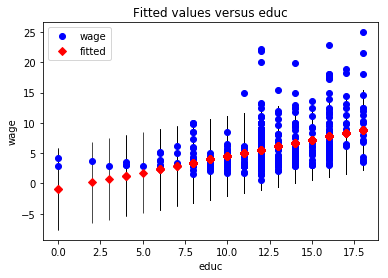

In [39]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_fit(results, 'educ')
plt.show()

In [40]:
resid = y - results.predict()
resid.sum()

-2.4158453015843406e-13

In [41]:
np.dot(d.educ.T,resid)

-3.069544618483633e-12

In [42]:
y.mean()

5.8961026767490505

In [43]:
sst = np.dot((y-y.mean()).T,(y-y.mean()))
sst

7160.414341766609

In [44]:
ssr = np.dot(resid.T, resid)
ssr

5980.682304828821

In [45]:
sse = np.dot((results.predict() - y.mean()).T,results.predict() - y.mean())
sse

1179.7320369377876

In [46]:
ssr + sse

7160.414341766608

In [47]:
rsq = 1 - ssr/sst
rsq

0.16475750991900373

### Normal Distribution - PDF and CDF

probability density function (PDF): probability at the point

cumulative distribution function (CDF): culmulative probability below that point

percent point function (PPF): inverse of cdf

In [48]:
from scipy.stats import norm

In [49]:
# norm(mean, sd)
norm(0,1).pdf(0)

0.3989422804014327

In [50]:
norm(0,1).cdf(0)

0.5

In [51]:
norm(0,1).pdf(-1.4)

0.14972746563574488

In [53]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
x

array([-2.32634787, -2.27935095, -2.23235402, -2.18535709, -2.13836017,
       -2.09136324, -2.04436631, -1.99736939, -1.95037246, -1.90337553,
       -1.85637861, -1.80938168, -1.76238475, -1.71538783, -1.6683909 ,
       -1.62139397, -1.57439705, -1.52740012, -1.48040319, -1.43340627,
       -1.38640934, -1.33941241, -1.29241549, -1.24541856, -1.19842163,
       -1.15142471, -1.10442778, -1.05743085, -1.01043393, -0.963437  ,
       -0.91644007, -0.86944314, -0.82244622, -0.77544929, -0.72845236,
       -0.68145544, -0.63445851, -0.58746158, -0.54046466, -0.49346773,
       -0.4464708 , -0.39947388, -0.35247695, -0.30548002, -0.2584831 ,
       -0.21148617, -0.16448924, -0.11749232, -0.07049539, -0.02349846,
        0.02349846,  0.07049539,  0.11749232,  0.16448924,  0.21148617,
        0.2584831 ,  0.30548002,  0.35247695,  0.39947388,  0.4464708 ,
        0.49346773,  0.54046466,  0.58746158,  0.63445851,  0.68145544,
        0.72845236,  0.77544929,  0.82244622,  0.86944314,  0.91

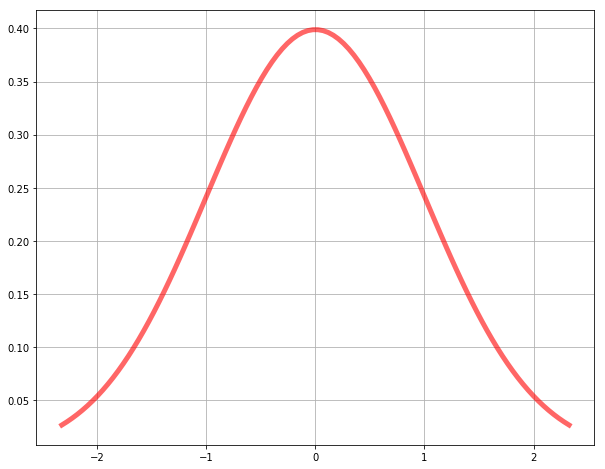

In [54]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
plt.grid(True)
plt.show()

### Draw random numbers

In [55]:
# Draw 5 random numbers from a normal distribution (mean = 0, sd = 1)
np.random.normal(0,1,5)

array([-0.38947054,  0.36824373, -0.83336957,  0.1932661 ,  1.11082805])

In [56]:
import numpy as np 
import math

i = 0
n = 100 #sample size
numsamples = 100000 # number of samples
a = np.empty([numsamples,1])
mu = 0 # mean 
sigma = 2 # standard deviation

while n < 105:
    i = 0
    while i < numsamples:
        a[i,0] = np.random.normal(mu, sigma, n).mean()
        i = i + 1
	
    print ("n = " + str(n))
    print ("mean of distribution of sample means = ", a.mean())
    print ("standard deviation of distribution of sample means = ", a.std())
    print ("standard deviation as per formula sqrt(1/n):", str(sigma*np.sqrt(float(1/n))))
    n = n + 1


n = 100
mean of distribution of sample means =  -0.00102699206059245
standard deviation of distribution of sample means =  0.199699856669299
standard deviation as per formula sqrt(1/n): 0.2
n = 101
mean of distribution of sample means =  0.0002556698236248483
standard deviation of distribution of sample means =  0.1994766896796927
standard deviation as per formula sqrt(1/n): 0.19900743804199783
n = 102
mean of distribution of sample means =  -0.00030536653973106453
standard deviation of distribution of sample means =  0.19841288959379982
standard deviation as per formula sqrt(1/n): 0.19802950859533486
n = 103
mean of distribution of sample means =  -0.0003057104147346489
standard deviation of distribution of sample means =  0.19688562927857617
standard deviation as per formula sqrt(1/n): 0.1970658556328586
n = 104
mean of distribution of sample means =  0.0005526642460040509
standard deviation of distribution of sample means =  0.19521301433508226
standard deviation as per formula sqrt

### 95% Confidence Interval with t-statistic

In [57]:
from scipy.stats import t

In [58]:
mu = 0
s = 1
n = 101
t.ppf(0.975, n-1)

1.9839715184496334

In [59]:
t.ppf(0.025, n-1)

-1.983971518449634

In [60]:
t.cdf(1.984, n-1) - t.cdf(-1.984, n-1)

0.9500032262038327

In [61]:
t.ppf(0.975, 100)

1.9839715184496334

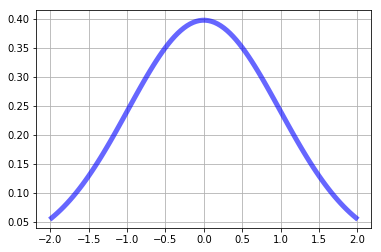

In [62]:
x = np.linspace(t.ppf(0.025,100),t.ppf(0.975,100), 100)
fig, ax = plt.subplots(1,1)
ax.plot(x,t.pdf(x,100), 'b-', lw=5, alpha=0.6, label='t-pdf')
plt.grid(True)
plt.show()